<a href="https://colab.research.google.com/github/chunnodu/ML-Notes/blob/master/How_to_Extract_Graph_based_Features_for_Machine_Learning_with%C2%A0NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
# Import
import numpy as np
import networkx as nx
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
# Helper functions

def create_color_map():
  # Define the colors for the colormap (from blue to orange)
  colors = ["#002049", "#FFA500"]  # Blue to Orange

  # Create a colormap
  return mcolors.LinearSegmentedColormap.from_list("blue_orange_cmap", colors)

def set_default_node_options():
  return {
    'node_color': '#4986e8',
    'node_size': 1000,
    'edgecolors': 'black',
    'linewidths': 2,
  }

def set_default_node_labels():
  return {
    'font_size': 10,
    'font_color': '#ffffff',
    'font_weight': 'bold',
  }

def set_default_edge_options():
  return {
    'edge_color': '#4986e8',
    'width': 2.5,
    'alpha': 0.7,
  }

def set_default_edge_labels(edge_labels):
  return {
    'edge_labels': edge_labels,
    'connectionstyle': 'arc3, rad=0.3',
    'font_size': 12,
    'font_color': 'orange',
    'bbox': {'alpha': 1, 'color': 'white'},
  }

def set_options_for_centrality(G, values, node_options):

  # Converts iterable centrality values into a NumPy array
  cent = np.fromiter(values, float)

  # Normalize and scale centrality values for node sizes
  sizes = cent / np.max(cent) * 1200

  # Create a normalized range of centrality values for color mapping
  normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())

  # Create a colormap
  colormap = create_color_map()

  # Map normalized data values to colors using the specified colormap.
  scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)

  # Associates the centrality values to this map and enable the color bar
  scalarmappaple.set_array(cent)

  # Add a color bar to the plot
  plt.colorbar(scalarmappaple, ax=plt.gca())

  # Enrich node options
  node_options["node_size"] = sizes
  node_options["node_color"] = sizes
  node_options["cmap"] = colormap

  return node_options


In [ ]:
# Draw function
def draw_graph(G, pos, node_options=None, edge_options=None, node_labels=None, edge_labels=None):

  # Draw nodes
  if not node_options:
    node_options = set_default_node_options()
  nx.draw_networkx_nodes(G, pos, **node_options)

  # Draw node labels
  if not node_labels:
    node_labels = set_default_node_labels()
  nx.draw_networkx_labels(G, pos, **node_labels)

  # Draw edges
  if not edge_options:
    edge_options = set_default_edge_options()
  nx.draw_networkx_edges(G, pos, **edge_options)

  # Draw edge labels
  if edge_labels:
    nx.draw_networkx_edge_labels(G, pos, **edge_labels)

  # Show the graph
  plt.axis('off')
  plt.gca().set_aspect('equal')
  plt.show()

# Load the Karate Club Network Dataset

Further details on [Wikipedia](https://en.wikipedia.org/wiki/Zachary%27s_karate_club).

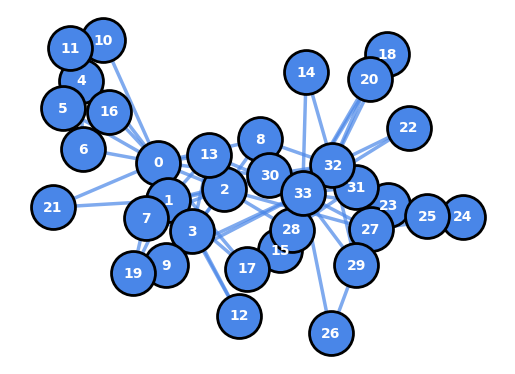

In [ ]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G, iterations=10, seed=20000)
draw_graph(G, pos)

# Node-Level Features

## Node Degree


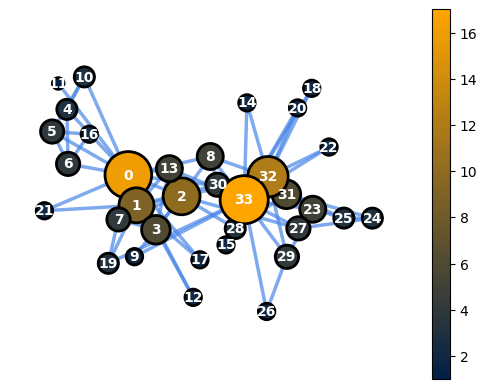

In [ ]:
dg = dict(G.degree())
node_options = set_options_for_centrality(G, dg.values(), set_default_node_options())
draw_graph(G, pos, node_options=node_options)

In [ ]:
# Average node degree
num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = 0
avg_degree = round(2 * num_edges / num_nodes)

print("Num edges:", num_edges, "Num nodes:", num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Num edges: 78 Num nodes: 34
Average degree of karate club network is 5


## Node Degree Centrality

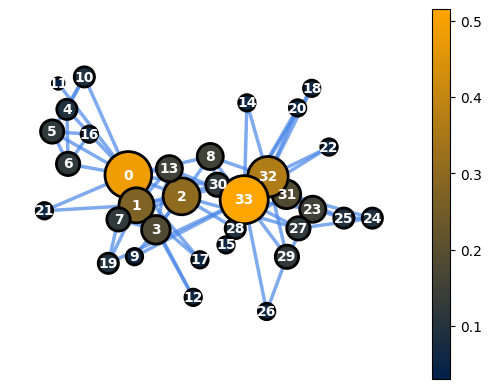

In [ ]:
dc = nx.degree_centrality(G)
node_options = set_options_for_centrality(G, dc.values(), set_default_node_options())
draw_graph(G, pos, node_options=node_options)

## Eigenvector Centrality

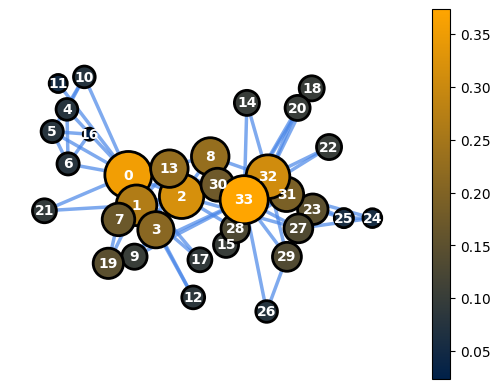

In [ ]:
ec = nx.eigenvector_centrality(G)
node_options = set_options_for_centrality(G, ec.values(), set_default_node_options())
draw_graph(G, pos, node_options=node_options)

## Betweenness Centrality

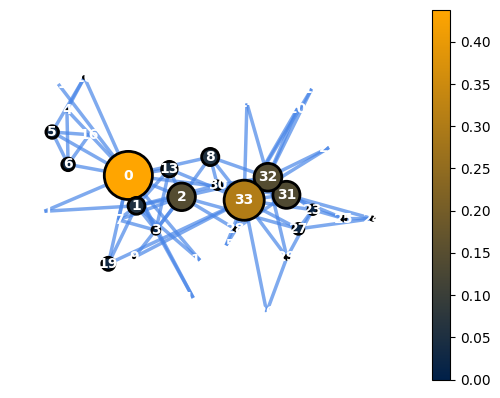

In [ ]:
bc = nx.betweenness_centrality(G)
node_options = set_options_for_centrality(G, bc.values(), set_default_node_options())
draw_graph(G, pos, node_options=node_options)

## Closeness Centrality


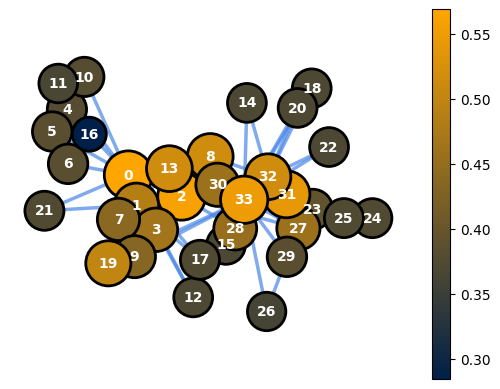

In [ ]:
ce = nx.closeness_centrality(G)
node_options = set_options_for_centrality(G, ce.values(), set_default_node_options())
draw_graph(G, pos, node_options=node_options)

## Clustering Coefficient

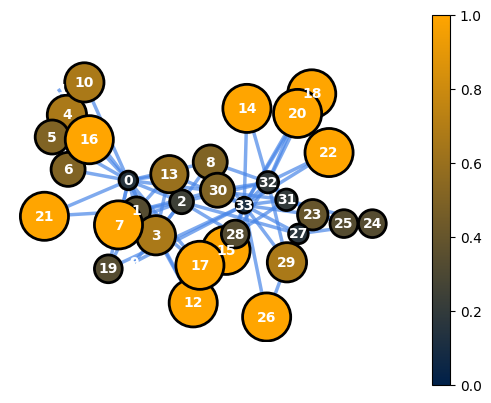

In [ ]:
cc = nx.clustering(G)
node_options = set_options_for_centrality(G, cc.values(), set_default_node_options())
draw_graph(G, pos, node_options=node_options)

# Compare Centrality Values
Node degree centrality, eigenvector centrality, betweeness centrality, closeness centrality.

In [ ]:
!pip install dataframe-image
!apt install firefox firefox-geckodriver
!pip install dataframe_image selenium

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package firefox-geckodriver is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  firefox

E: Package 'firefox-geckodriver' has no installation candidate


In [ ]:
import pandas as pd
import dataframe_image as dfi

In [ ]:
# Create a list with all the centrality values
data = [dc, ec, bc, ce]
indices = ['Degree Centrality', 'Eigenvector Centrality', 'Betweenness Centrality', 'Closeness Centrality']
df = pd.DataFrame(data, index=indices).T
df_styled = df.style.background_gradient(cmap=create_color_map())
df_styled

,Degree Centrality,Eigenvector Centrality,Betweenness Centrality,Closeness Centrality
0,0.484848,0.355483,0.437635,0.568966
1,0.272727,0.265954,0.053937,0.485294
2,0.303030,0.317189,0.143657,0.559322
3,0.181818,0.211174,0.011909,0.464789
4,0.090909,0.075966,0.000631,0.379310
5,0.121212,0.079481,0.029987,0.383721
6,0.121212,0.079481,0.029987,0.383721
7,0.121212,0.170955,0.000000,0.440000
8,0.151515,0.227405,0.055927,0.515625
9,0.060606,0.102675,0.000848,0.434211


In [ ]:
 df_styled.export_png('df_styled.png', table_conversion='selenium')

# Edge-level Features

## Distance-based Features

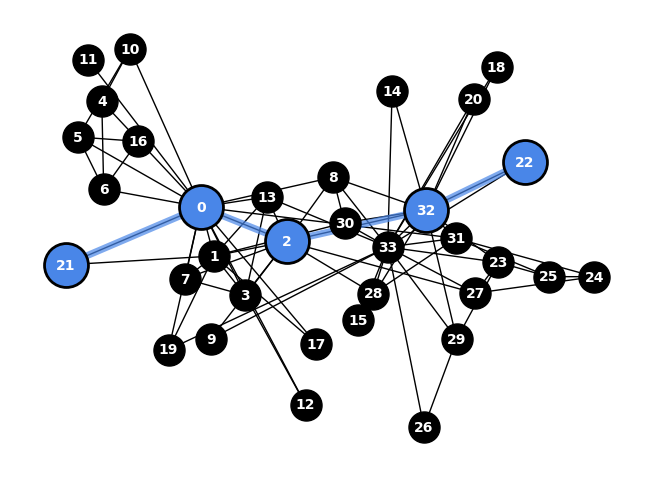

In [ ]:
# Identify the shortest path
path = nx.shortest_path(G, source=21, target=22)
path_edges = list(zip(path,path[1:]))
node_options = set_default_node_options()

# Draw and highlight nodes and edges
nx.draw(G, pos, node_color='black', node_size=500)

node_options = {
  'nodelist': path,
  'node_color': '#4986e8',
  'node_size': 1000,
  'edgecolors': 'black',
  'linewidths': 2,
}

edge_options = {
  'edgelist': path_edges,
  'edge_color': '#4986e8',
  'width': 5,
  'alpha': 0.7,
}

draw_graph(G, pos, node_options=node_options, edge_options=edge_options)

## Local Neighborhood Overlap

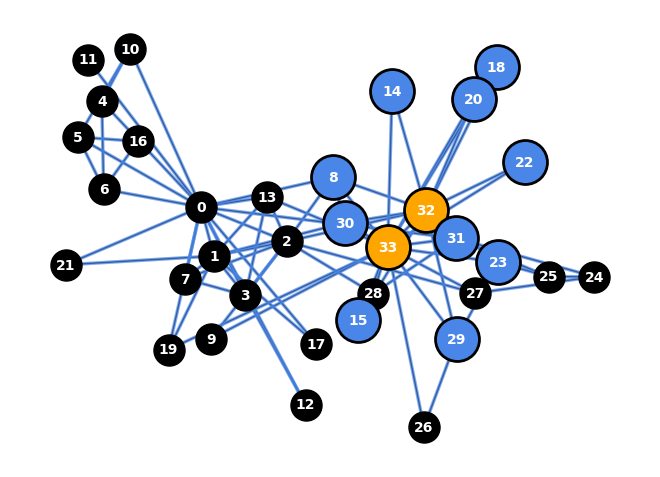

In [ ]:
# Identify common local neighbors
loc_neigh = sorted(nx.common_neighbors(G, 32, 33))

# Draw and highlight selected nodes
nx.draw(G, pos, node_color='k', node_size=500)

selected_options = {
  'nodelist': [32, 33],
  'node_color': 'orange',
  'node_size': 1000,
  'edgecolors': 'black',
  'linewidths': 2,
}

nx.draw_networkx_nodes(G, pos, **selected_options)

# Draw and highlight neighbors
node_options = {
  'nodelist': loc_neigh,
  'node_color': '#4986e8',
  'node_size': 1000,
  'edgecolors': 'black',
  'linewidths': 2,
}

draw_graph(G, pos, node_options=node_options)

## Global Neighborhood Overlap

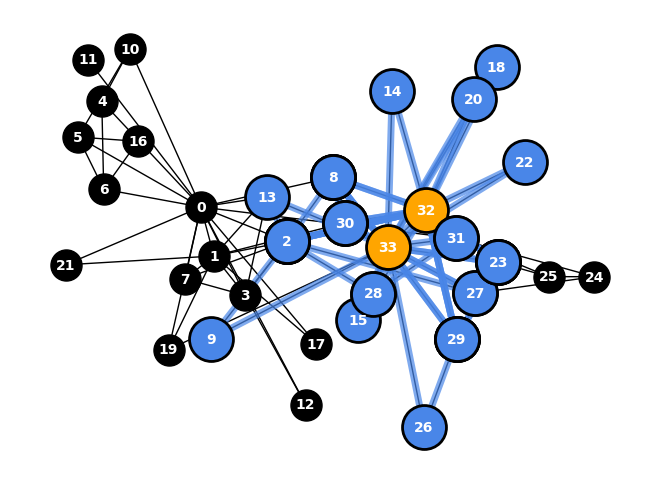

In [ ]:
# Detect local neihborhood overlap
edges = []
nodes = []
paths = nx.all_simple_paths(G, source=32, target=33, cutoff=3)

for p in paths:
  nodes.append(p)
  edge = list(zip(p, p[1:]))
  edges.append(edge)

# Flat lists for nodes and edges
nodes = [
    x
    for xs in nodes
    for x in xs
]

edges = [
    x
    for xs in edges
    for x in xs
]

# Draw basic elements of the graph
nx.draw(G, pos, node_color='k', node_size=500)

# Draw source and target nodes
selected_options = {
  'nodelist': [32, 33],
  'node_color': 'orange',
  'node_size': 1000,
  'edgecolors': 'black',
  'linewidths': 2,
}

nx.draw_networkx_nodes(G, pos, **selected_options)

# Draw global neighbor nodes and the related connections with source and target
node_options = {
  'nodelist': [n for n in nodes if n not in [32, 33]],
  'node_color': '#4986e8',
  'node_size': 1000,
  'edgecolors': 'black',
  'linewidths': 2,
}

edge_options = {
  'edgelist': edges,
  'edge_color': '#4986e8',
  'width': 5,
  'alpha': 0.7,
}

draw_graph(G, pos, node_options=node_options, edge_options=edge_options)

# Graph-Level Features

## Weisfeiler-Leman Features


In [ ]:
import networkx as nx
import numpy as np
from networkx.algorithms import isomorphism

# Get the adjacency matrix of G1
adj_matrix = nx.to_numpy_array(G)

# Create a random permutation of the nodes
n = G.number_of_nodes()
np.random.seed(42)
permutation = np.random.permutation(n)

# Create the permutation matrix
P = np.zeros((n, n))
for i in range(n):
    P[i, permutation[i]] = 1

# Apply the permutation to the adjacency matrix: P*A*P^T
permuted_adj_matrix = P @ adj_matrix @ P.T

# Create the permuted graph from the permuted adjacency matrix
G_perm = nx.from_numpy_array(permuted_adj_matrix)

# Check if the graphs are isomorphic
iso_check = isomorphism.is_isomorphic(G, G_perm)
print(f"Are G and G_perm isomorphic? {iso_check}")

# Compute the Weisfeiler-Lehman graph hashes for both graphs
hash_G = nx.weisfeiler_lehman_graph_hash(G)
hash_G_perm = nx.weisfeiler_lehman_graph_hash(G_perm)

# Print the hashes
print(f"Weisfeiler-Lehman Graph Hash of G: {hash_G}")
print(f"Weisfeiler-Lehman Graph Hash of G_perm: {hash_G_perm}")

# Compare the hashes
are_hashes_equal = hash_G == hash_G_perm
print(f"Are the WL graph hashes of G and G_perm equal? {are_hashes_equal}")

Are G and G_perm isomorphic? True
Weisfeiler-Lehman Graph Hash of G: c7184009df3be2e402cfcb318efaa4b3
Weisfeiler-Lehman Graph Hash of G_perm: c7184009df3be2e402cfcb318efaa4b3
Are the WL graph hashes of G and G_perm equal? True


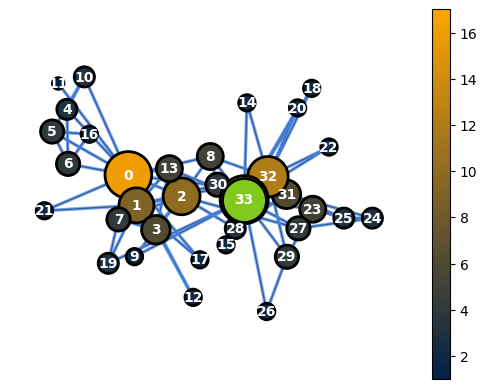

In [ ]:
# Default node features
node_options = set_options_for_centrality(G, dg.values(), set_default_node_options())

nx.draw(G, pos, **node_options)

# Emphasize node 33 to check how it is permuted
node_options = {
  'nodelist': [33],
  'node_color': '#82c91e',
  'node_size': 1000,
  'edgecolors': 'black',
  'linewidths': 2,
}

node_labels = {
  'font_size': 10,
  'font_color': '#ffffff',
  'font_weight': 'bold',
}

draw_graph(G, pos, node_options=node_options, node_labels=node_labels)

In [ ]:
# Get the node corresponding to 33 after the permutation
node_id = 33

# Find the index of the value 33
index = np.where(permutation == 33)[0][0]

print(index)

29


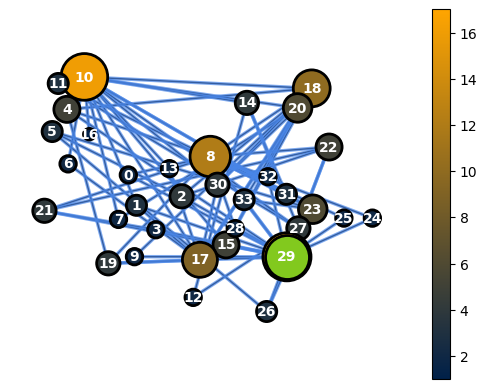

In [ ]:
# Compute node degree of the permuted graph
dg_perm = dict(G_perm.degree())

node_options = set_options_for_centrality(G_perm, dg_perm.values(), set_default_node_options())

nx.draw(G_perm, pos, **node_options)

# Emphasize node 29, which is the result of the permutation
node_options = {
  'nodelist': [29],
  'node_color': '#82c91e',
  'node_size': 1000,
  'edgecolors': 'black',
  'linewidths': 2,
}

node_labels = {
  'font_size': 10,
  'font_color': '#ffffff',
  'font_weight': 'bold',
}

draw_graph(G_perm, pos, node_options=node_options, node_labels=node_labels)

In [ ]:
assert dg[33] == dg_perm[29]

## Graphlets

In [ ]:
%%capture
!apt install libgraphviz-dev
!pip install pygraphviz

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


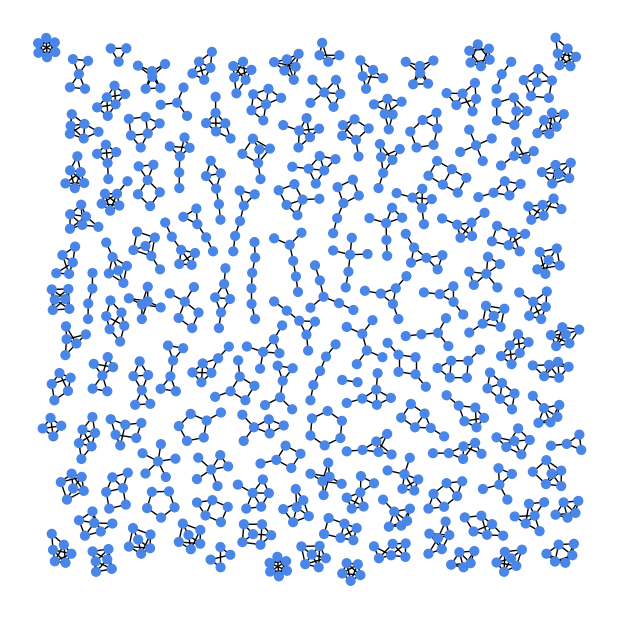

In [ ]:
import random

GraphMatcher = nx.isomorphism.vf2userfunc.GraphMatcher

def atlas6():
    Atlas = nx.graph_atlas_g()[3:209]  # 0, 1, 2 => no edges. 208 is last 6 node graph
    U = nx.Graph()  # graph for union of all graphs in atlas
    for G in Atlas:
        # check if connected
        if nx.number_connected_components(G) == 1:
            # check if isomorphic to a previous graph
            if not GraphMatcher(U, G).subgraph_is_isomorphic():
                U = nx.disjoint_union(U, G)
    return U

G_atlas = atlas6()

plt.figure(1, figsize=(6, 6))

# layout graphs with positions using graphviz neato
pos = nx.nx_agraph.graphviz_layout(G_atlas, prog="neato")

# color nodes the same in each connected subgraph
C = (G_atlas.subgraph(c) for c in nx.connected_components(G_atlas))


for g in C:
    c = ['#4986e8'] * nx.number_of_nodes(g)  # random color...
    nx.draw(g, pos=pos, node_size=40, node_color=c, vmin=0.0, vmax=1.0, with_labels=False)
plt.show()